In [1]:
%load_ext autoreload
%autoreload 2
%load_ext nb_black
import ncxt_sxtcnn

<IPython.core.display.Javascript object>

In [2]:
import logging

logger = logging.getLogger("ncxt_sxtcnn.sxtcnn").setLevel(logging.ERROR)

<IPython.core.display.Javascript object>

In [3]:
from ncxt_sxtcnn.sxtcnn.loaders import AmiraLoaderx100
from ncxt_sxtcnn.sxtcnn.loaders import AmiraLoaderClahe
from ncxt_sxtcnn.sxtcnn.models import UNet3D
from ncxt_sxtcnn.sxtcnn.processors import RandomBlockProcessor
from ncxt_sxtcnn.sxtcnn.criteria import CrossEntropyLoss_DiceLoss

<IPython.core.display.Javascript object>

### Setup Database

In [4]:
from ncxt_sxtcnn.hxdatabase import Database

db = Database("mockdata/")
membrane = ["membrane"]
nucleus = ["euchromatin", "heterochromatin", "nucleus", "nucleolus"]
nucleolus = ["nucleolus"]
hxfiles = db.filelist(membrane, nucleus, nucleolus)
db.dataframe_sel(membrane, nucleus)

mockdata/


C:\Users\axela\Miniconda3\lib\site-packages\pandas\core\ops.py:1649: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  result = method(y)
C:\Users\axela\Miniconda3\lib\site-packages\pandas\core\ops.py:1649: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  result = method(y)


,project,sample,endoplasmic reticulum,granule,ignore,lipid,membrane,mitochondria,nucleolus,nucleus,void,void1
0,pi1,sample_12,7,4,9,6,8,5,3,2,0,1
1,pi2,sample_9,4,,,2,6,3,5,1,0,


<IPython.core.display.Javascript object>

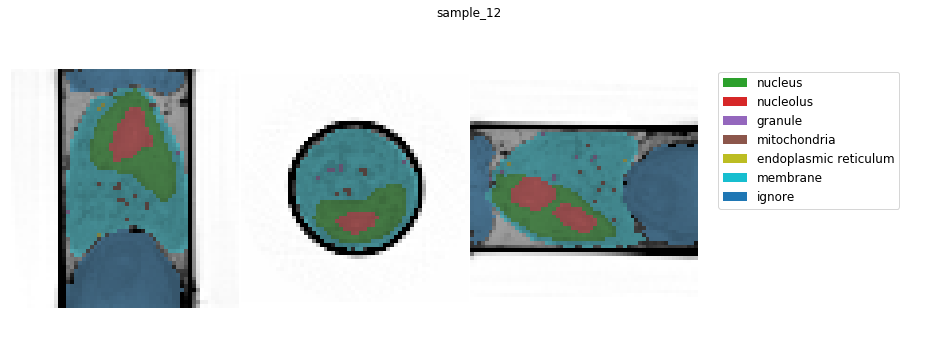

<IPython.core.display.Javascript object>

In [5]:
import ncxtamira
proj = ncxtamira.CellProject(hxfiles[0])
proj.preview()

In [6]:
from ncxt_sxtcnn import Segmenter

files = db.filelist(membrane, nucleus, nucleolus)
features = [["*"], nucleus, nucleolus]
working_directory = "C:/Users/axela/Documents/2020/example_wd/"

loader_args = {"files": files, "features": features}

processor_args = {"block_shape": (32, 32, 32), "binning": 1}

model_args = {
    "num_classes": len(features) + 1,
    "depth": 3,
    "start_filts": 32,
    "dropout": None,
    "instancenorm": True,
}
crit_args = dict()
settings = {"maximum_iterations": 50}

segmenter = Segmenter(
    AmiraLoaderx100,
    RandomBlockProcessor,
    UNet3D,
    CrossEntropyLoss_DiceLoss,
    loader_args,
    processor_args,
    model_args,
    crit_args,
    settings,
)
segmenter.folder = working_directory
segmenter.fold = 0

C:\Users\axela\Miniconda3\lib\site-packages\pandas\core\ops.py:1649: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  result = method(y)


<IPython.core.display.Javascript object>

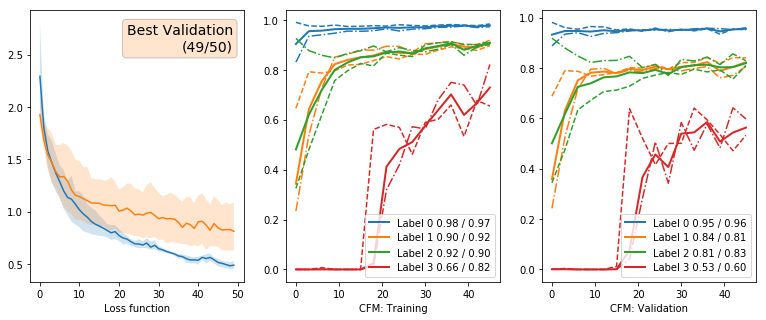

<IPython.core.display.Javascript object>

In [7]:
instance = segmenter.sxtcnn(0)
instance.run()
instance.logger.plot()

In [16]:
loader_args = {"files": files, "features": features, "clip_limit": 0.01}
segmenter_cl = Segmenter(
    AmiraLoaderClahe,
    RandomBlockProcessor,
    UNet3D,
    CrossEntropyLoss_DiceLoss,
    loader_args,
    processor_args,
    model_args,
    crit_args,
    settings,
)
segmenter_cl.folder = working_directory
segmenter_cl.fold = 0

<IPython.core.display.Javascript object>

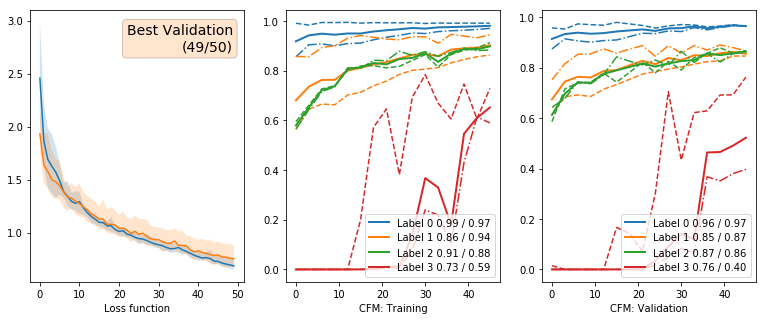

<IPython.core.display.Javascript object>

In [17]:
instance_cl = segmenter_cl.sxtcnn(0)
instance_cl.run()
instance_cl.logger.plot()

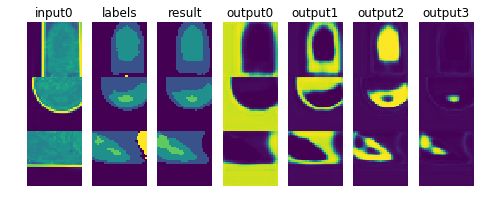

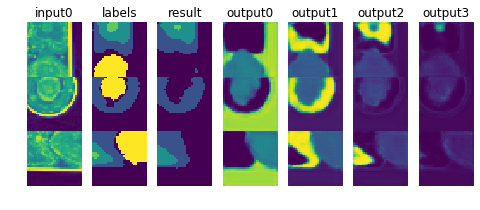

<IPython.core.display.Javascript object>

In [18]:
instance.show_training_data()
instance_cl.show_training_data()

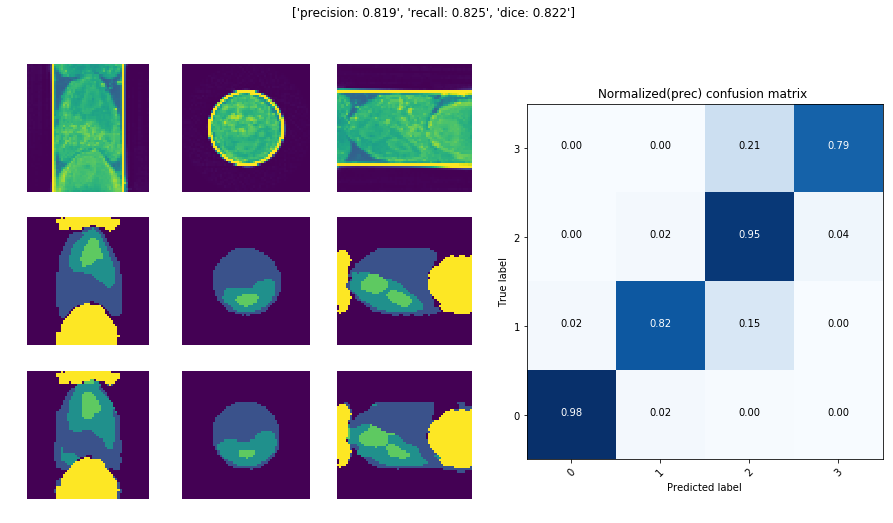

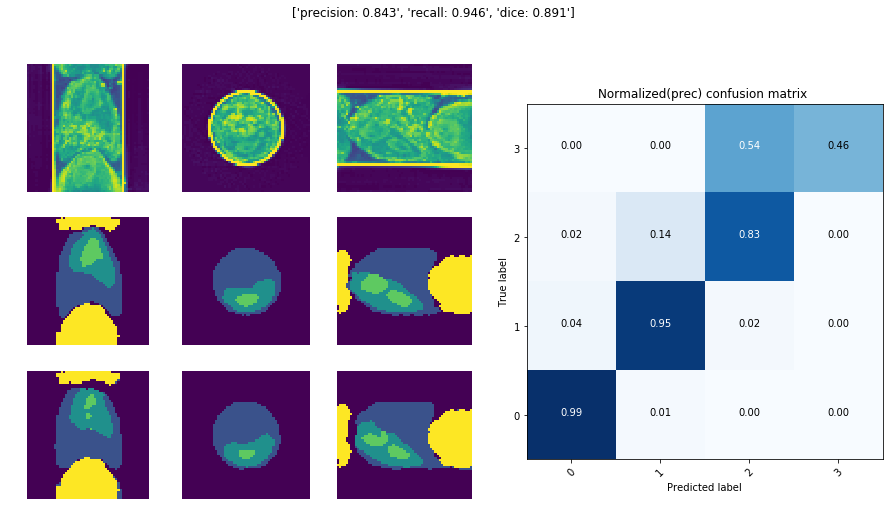

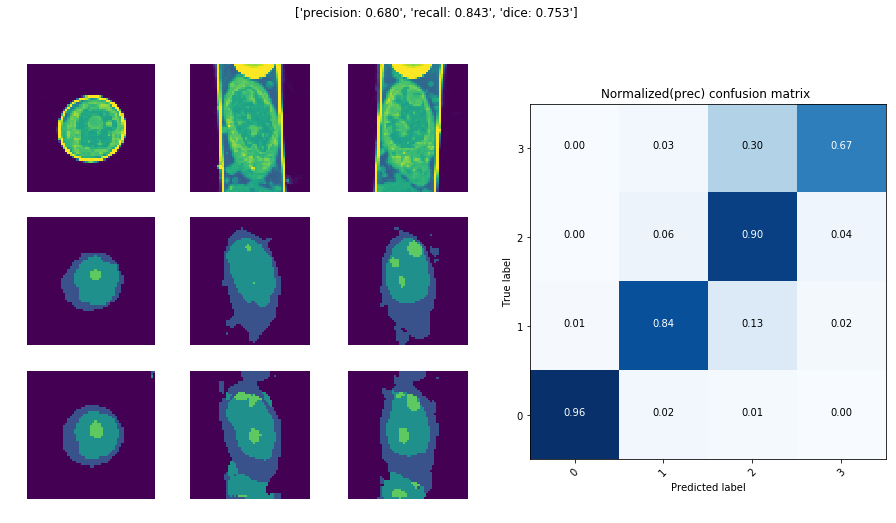

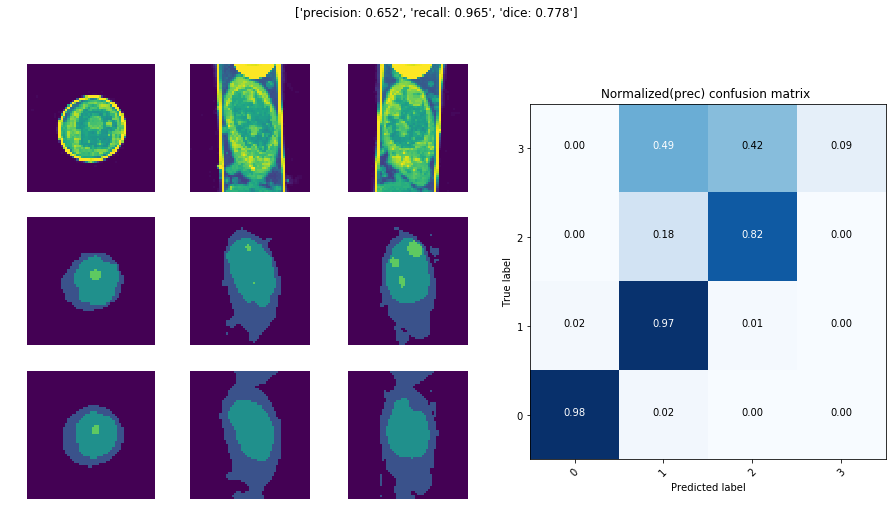

<IPython.core.display.Javascript object>

In [19]:
for index in instance.valid_idx:
    _ = instance.evaluate_sample(index, plot=True)
    _ = instance_cl.evaluate_sample(index, plot=True)